# Plan Comparison: SBRT_lung_minsun

In [100]:
import sys
sys.path.append('../../src')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import analyze
import raybay

In [101]:
approved = np.load('approved/result', allow_pickle=True)
default = np.load('default/result', allow_pickle=True)
bayes_pars = np.load('bayes_pars/result', allow_pickle=True)
bayes_weights = np.load('bayes_weights/result', allow_pickle=True)
bayes_both =  np.load('bayes_both/result', allow_pickle=True)

## Clinical goals

In [102]:
approved.goals

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Bronchus,MaxDvh,AtMost,1560,18.52
1,Bronchus,MaxDose,AtMost,3480,NaN
2,Chestwall_L,MaxDvh,AtMost,3000,2.04
3,D2cm,MaxDose,AtMost,2400,NaN
4,Esophagus,MaxDvh,AtMost,1880,16.91
5,Esophagus,MaxDose,AtMost,3000,NaN
6,GreatVes,MaxDvh,AtMost,4300,5.66
7,GreatVes,MaxDose,AtMost,4900,NaN
8,Heart,MaxDvh,AtMost,2800,1.84
9,Heart,MaxDose,AtMost,3400,NaN


## Objective Function Terms

My objective function terms were chosen to correspond to the clinical goals.

In [103]:
default.funcs

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Bronchus,MaxDvh,1560,18.52,NaN,1
1,Bronchus,MaxDose,3480,0,NaN,1
2,Chestwall_L,MaxDvh,3000,2.04,NaN,1
3,D2cm,MaxDose,2400,0,NaN,1
4,Esophagus,MaxDvh,1880,16.91,NaN,1
5,Esophagus,MaxDose,3000,0,NaN,1
6,GreatVes,MaxDvh,4300,5.66,NaN,1
7,GreatVes,MaxDose,4900,0,NaN,1
8,Heart,MaxDvh,2800,1.84,NaN,1
9,Heart,MaxDose,3400,0,NaN,1


I compare the result of five plans:
* The approved plan
* The plan created with my objective function terms without tuning
* The plan created by tuning the DoseLevel parameters
* The plan created by tuning the Weight parameters
* The plan created by tuning both the DoseLevel and Weight parameters

I compare the five different plans based on the outcome of the clinical goal values.
DoseLevel parameters are tuned between [0.5*AcceptanceLevel, AcceptanceLevel], and Weights are tuned between [1, 10000].
I didn't tune the DoseLevel for the PTV goals, but I did tune their weights.
The final plans are normalized to the PTV D95 = 4800.

## Objective Function

My plans are scored as a linear combination of the clinical goal values.
For example, the bronchus has a clinical goal of MaxDose AtMost 3480, so its contribution to the objective function is:
$$\frac{MaxDose - 3480}{3480}$$

Below, we have the convergence results for each of the tuned plans.
Due to the larger number of parameters (pars=21, weights=23, both=44), I think it would be good to run these again with more iterations.
I'm also interested in reducing the number of parameters tuned and/or the number of objective function terms to reduce computation time.

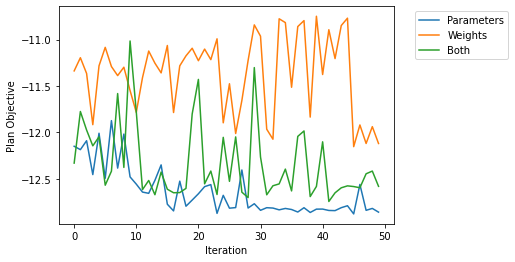

In [18]:
plt.plot(bayes_pars.opt_result.func_vals)
plt.plot(bayes_weights.opt_result.func_vals)
plt.plot(bayes_both.opt_result.func_vals)

plt.xlabel('Iteration')
plt.ylabel('Plan Objective')
plt.legend(['Parameters', 'Weights', 'Both'], bbox_to_anchor=(1.05,1));

In [112]:
print('Treatment Plan Scores:')
print(f'  * Approved plan: {approved.opt_result:.2f}')
print(f'  * Default plan: {default.opt_result:.2f}')
print(f'  * DoseLevel plan: {bayes_pars.opt_result.fun:.2f}')
print(f'  * Weights plan: {bayes_weights.opt_result.fun:.2f}')
print(f'  * Both plan: {bayes_both.opt_result.fun:.2f}')

Treatment Plan Scores:
  * Approved plan: -12.15
  * Default plan: -12.49
  * DoseLevel plan: -12.88
  * Weights plan: -12.15
  * Both plan: -12.74


/Users/Kelsey/anaconda3/envs/autoray/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


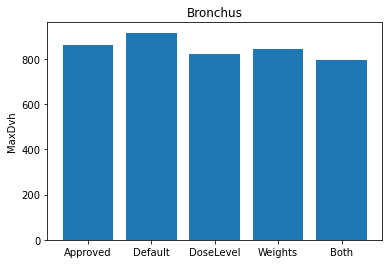

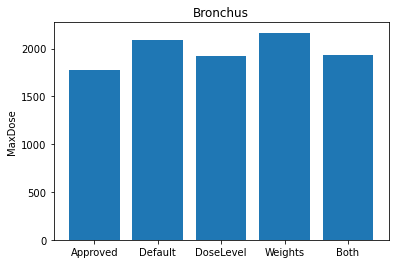

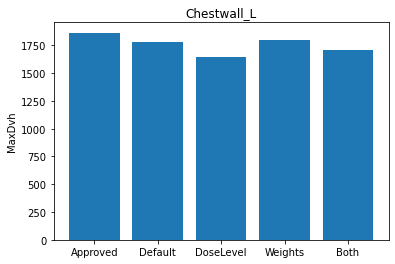

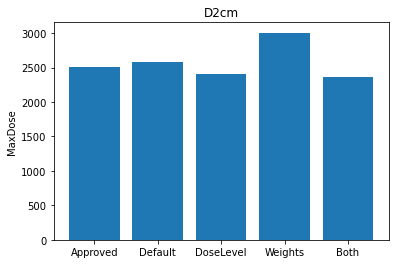

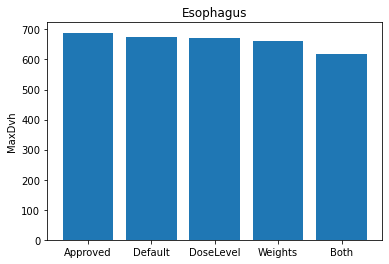

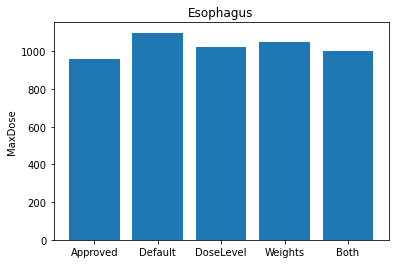

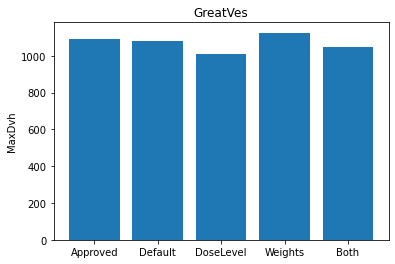

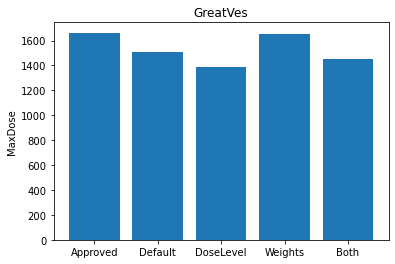

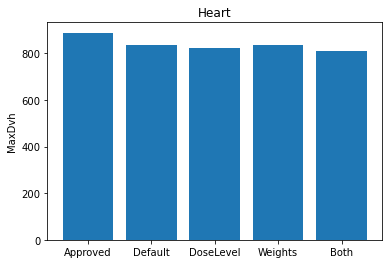

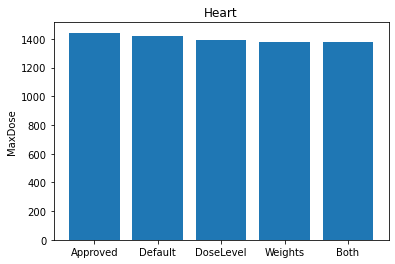

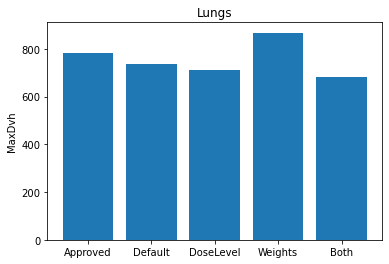

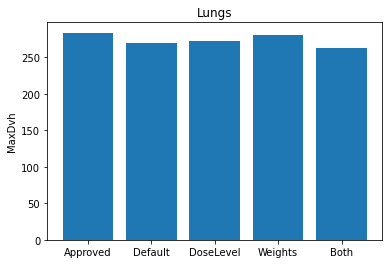

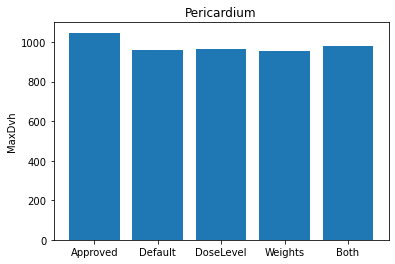

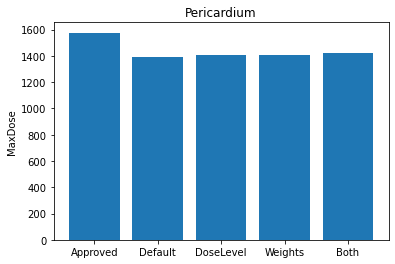

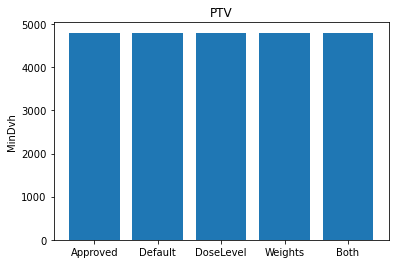

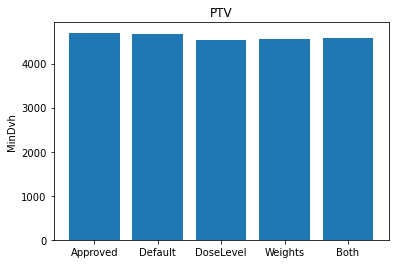

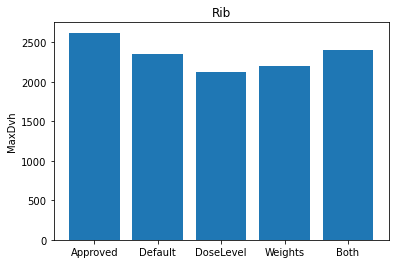

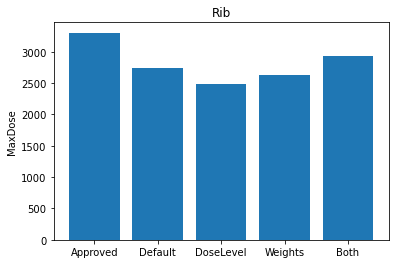

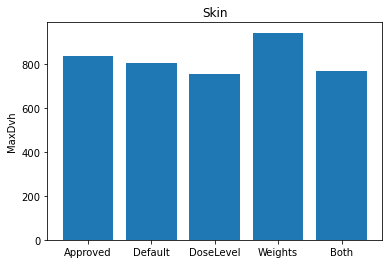

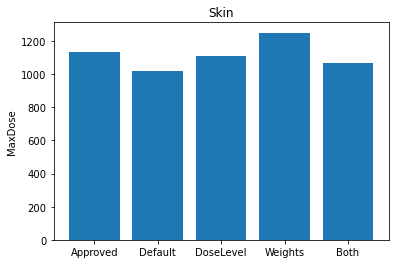

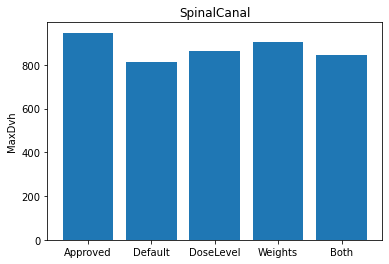

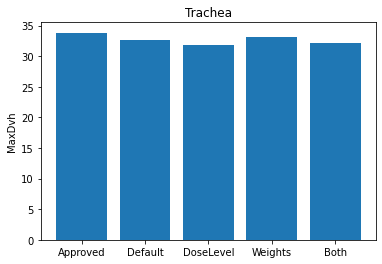

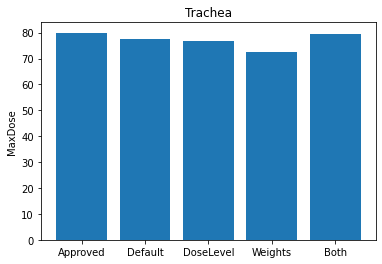

In [122]:
idx_pars = np.argmin(bayes_pars.opt_result.func_vals)
idx_weights = np.argmin(bayes_weights.opt_result.func_vals)
idx_both = np.argmin(bayes_both.opt_result.func_vals)
for index, row in goals.iterrows():
    temp_approved = approved.goal_result[index][0]
    temp_default = default.goal_result[index][0]
    temp_pars = bayes_pars.goal_result[index][idx_pars]
    temp_weights = bayes_weights.goal_result[index][idx_weights]
    temp_both = bayes_both.goal_result[index][idx_both]
    plt.figure()
    plt.bar(
        x=np.arange(5),
        height=[temp_approved, temp_default, temp_pars, temp_weights, temp_both],
        tick_label=['Approved', 'Default', 'DoseLevel', 'Weights', 'Both']
    )
    plt.ylabel(row['Type'])
    plt.title(row['Roi'])

In [138]:
print('D2cm:')
print(f"  * Acceptance level: {goals.iloc[3]['AcceptanceLevel']}")
print(f'  * Approved plan: {approved.goal_result[3][0]:.2f}')
print(f'  * Default plan: {default.goal_result[3][0]:.2f}')
print(f'  * DoseLevel plan: {bayes_pars.goal_result[3][idx_pars]:.2f}')
print(f'  * Weights plan: {bayes_weights.goal_result[3][idx_weights]:.2f}')
print(f'  * Both plan: {bayes_both.goal_result[3][idx_both]:.2f}')

D2cm:
  * Acceptance level: 2400
  * Approved plan: 2513.27
  * Default plan: 2587.10
  * DoseLevel plan: 2403.57
  * Weights plan: 3006.01
  * Both plan: 2357.99


## Dose-volume Histograms

These all look pretty similar, though the max dose to the PTV is higher for some plans.
We could include a MaxDose term in the objective if this is a problem.

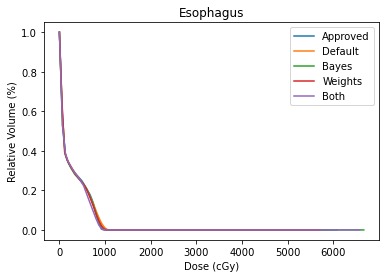

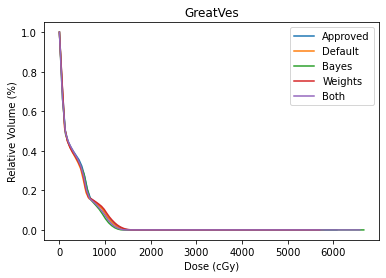

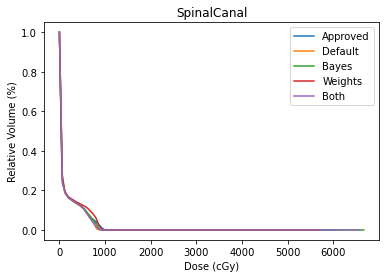

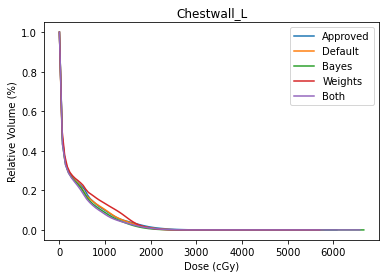

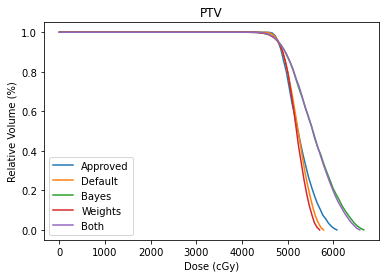

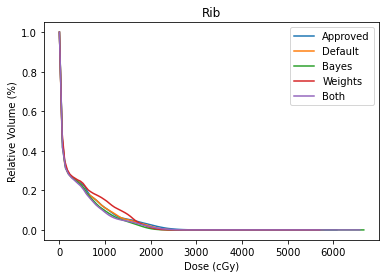

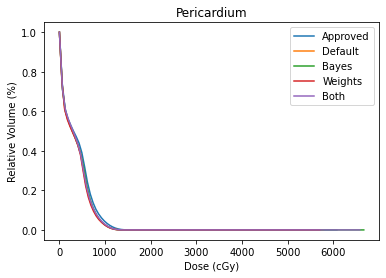

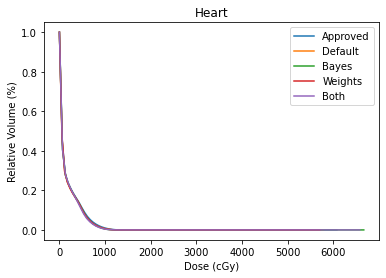

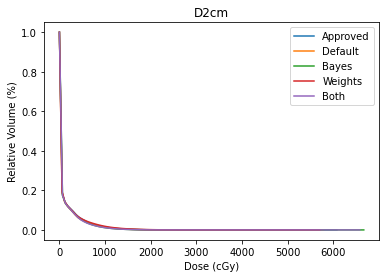

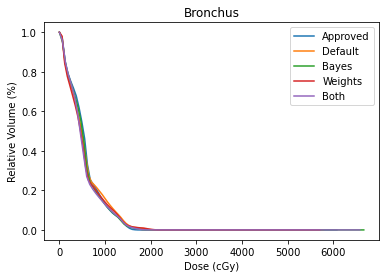

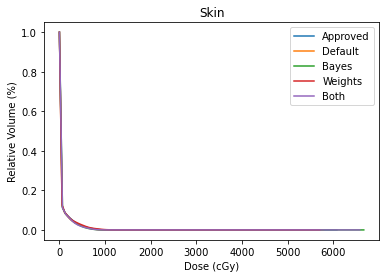

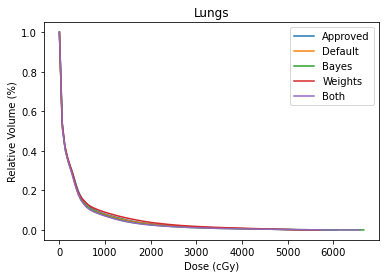

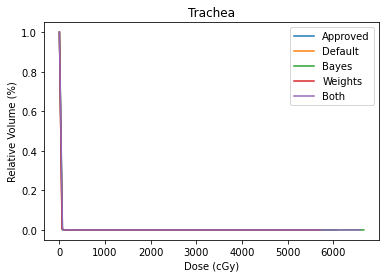

In [97]:
for roi in approved.roi_list:
    plt.figure()
    plt.plot(approved.dvh_result['Dose'], approved.dvh_result[roi])
    plt.plot(default.dvh_result['Dose'], default.dvh_result[roi])
    plt.plot(bayes_pars.dvh_result['Dose'], bayes_pars.dvh_result[roi])
    plt.plot(bayes_weights.dvh_result['Dose'], bayes_weights.dvh_result[roi])
    plt.plot(bayes_both.dvh_result['Dose'], bayes_both.dvh_result[roi])
    plt.xlabel('Dose (cGy)')
    plt.ylabel('Relative Volume (%)')
    plt.title(roi)
    plt.legend(['Approved', 'Default', 'Bayes', 'Weights', 'Both'])

In [167]:
temp = np.load('../patient1/full/sample/pars.npy', allow_pickle=True)

In [153]:
pars_goals = pd.DataFrame(data=bayes_pars.goal_result)

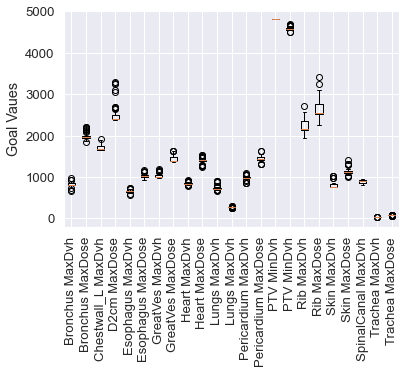

In [158]:
analyze.boxplot(goals, pars_goals, 'goals')

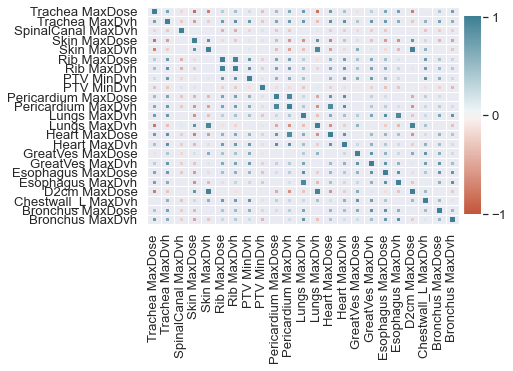

In [206]:
analyze.corrplot(goals, pars_goals, size=10)

In [179]:
funcs_pars = raybay.get_funcs('bayes_pars/funcs.csv')

In [178]:
pars_funcs

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Bronchus,MaxDvh,"[780.0, 1560.0]",18.52,NaN,1
1,Bronchus,MaxDose,"[1740.0, 3480.0]",0,NaN,1
2,Chestwall_L,MaxDvh,"[1500.0, 3000.0]",2.04,NaN,1
3,D2cm,MaxDose,"[1200.0, 2400.0]",0,NaN,1
4,Esophagus,MaxDvh,"[940.0, 1880.0]",16.91,NaN,1
5,Esophagus,MaxDose,"[1500.0, 3000.0]",0,NaN,1
6,GreatVes,MaxDvh,"[2150.0, 4300.0]",5.66,NaN,1
7,GreatVes,MaxDose,"[2450.0, 4900.0]",0,NaN,1
8,Heart,MaxDvh,"[1400.0, 2800.0]",1.84,NaN,1
9,Heart,MaxDose,"[1700.0, 3400.0]",0,NaN,1


In [191]:
type(temp.iloc[0]['Sample'])

numpy.int64

In [173]:
bayes_pars.opt_result.x_iters

[[957.3244822646429,
  2295.0116728457215,
  2967.334345617874,
  1746.7018959938544,
  1229.531999276475,
  1895.806258556848,
  2336.4983741559827,
  3477.4619155203964,
  1422.2745053457877,
  2597.2001511953104,
  1868.801458207809,
  771.8867646228214,
  1950.1192338191786,
  2846.3617189962233,
  2675.7076371859735,
  3388.06315084376,
  2234.3150741646123,
  3473.150744111619,
  1313.087120845133,
  1365.5949277313662,
  2183.515668758939],
 [1444.0097773048003,
  2042.8518095193242,
  2686.145267365073,
  2325.155202744926,
  1361.8962476552115,
  2076.9743481696755,
  2918.5717682419604,
  2923.7212773114034,
  1540.6635603814477,
  2520.4827341012806,
  1613.7034697263293,
  1131.7240394420378,
  1888.2589259166014,
  2170.0750032399637,
  2314.409432037443,
  3915.8274578153296,
  1958.0976422917697,
  2056.888344115677,
  1126.8484240096557,
  1206.843398625576,
  2279.7640809705485],
 [1000.5213867789048,
  3342.5287598283726,
  2150.0132462306783,
  1702.5086708038316,
  

In [197]:
pars_funcs = pd.DataFrame(columns=['Sample', 'Term', 'Roi', 'DoseLevel', 'PercentVolume', 'EudParameterA', 'Weight'])

In [198]:
for sample in range(50):
    for term in range(23):
        pars_funcs = pars_funcs.append({
            'Sample': int(sample),
            'Term': int(term),
            'Roi': funcs_pars.iloc[term]['Roi'],
            'DoseLevel': bayes_pars.goal_result[term][sample],
            'PercentVolume': funcs_pars.iloc[term]['PercentVolume'],
            'EudParameterA': funcs_pars.iloc[term]['EudParameterA'],
            'Weight': funcs_pars.iloc[term]['Weight']                
        }, ignore_index=True)

In [199]:
pars_funcs

,Sample,Term,Roi,DoseLevel,PercentVolume,EudParameterA,Weight
0,0,0,Bronchus,746.761903,18.52,NaN,1
1,0,1,Bronchus,2126.448730,0.00,NaN,1
2,0,2,Chestwall_L,1886.179848,2.04,NaN,1
3,0,3,D2cm,2587.917480,0.00,NaN,1
4,0,4,Esophagus,670.152016,16.91,NaN,1
...,...,...,...,...,...,...,...
1145,49,18,Skin,761.094084,0.27,NaN,1
1146,49,19,Skin,1115.168823,0.00,NaN,1
1147,49,20,SpinalCanal,931.415290,0.67,NaN,1
1148,49,21,Trachea,31.917996,15.21,NaN,1


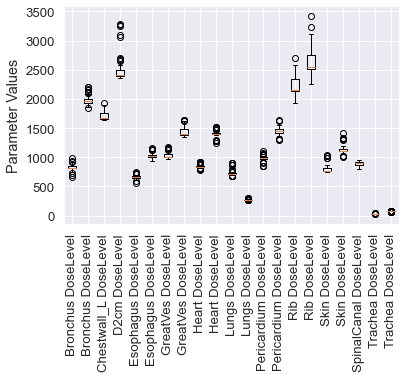

In [202]:
analyze.boxplot(funcs_pars, pars_funcs, 'pars')

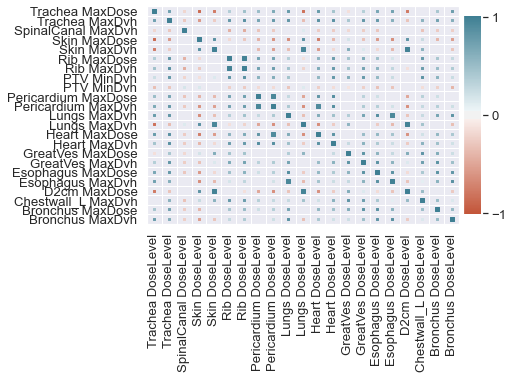

In [207]:
analyze.corrplot(goals, pars_goals, funcs_pars, pars_funcs, size=10)

TODO:
* rewrite functions in analyze to fit my new format
* create plots for other plans
* write up nice for Minsun
* Think about what other plans to try, dimensionality reduction?

In [208]:
ydata, ylabels = analyze.format_data(goals, pars_goals, 'goals')

In [210]:
xdata, xlabels = analyze.format_data(funcs_pars, pars_funcs, 'pars')

In [213]:
X = np.zeros((len(xdata), len(ydata)))

In [214]:
for ii in range(len(xdata)):
    for jj in range(len(ydata)):
        X[ii, jj] = np.corrcoef(xdata[ii], ydata[jj])[0, 1]

In [222]:
U, S, Vh = np.linalg.svd(X)

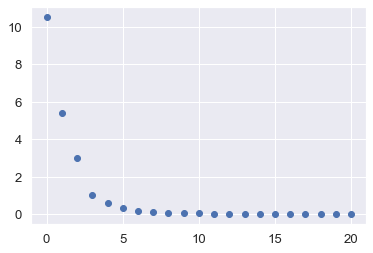

In [223]:
plt.plot(S, 'o')

In [ ]:
# How would we select which function terms to use?
# If we wanted to so some sort of SVD projection for the objective function, how would we do that?
# Am I even doing the right thing with my SVD? What do I take the SVD of?
# What if matrix was all of my parameters and the function values?

In [250]:
Y = np.zeros((22, 50))
#Y[0,:] = bayes_pars.opt_result.func_vals
for ii in range(21):
    Y[:-1,ii] = bayes_pars.opt_result.x_iters[ii]

In [259]:
Y = np.array(bayes_pars.opt_result.x_iters)

In [260]:
Y.shape

(50, 21)

In [261]:
Z = np.zeros((50,22))
Z[:,:-1] = Y

In [269]:
Z[:,-1] = bayes_pars.opt_result.func_vals

In [270]:
U,S,Vh = np.linalg.svd(Z)

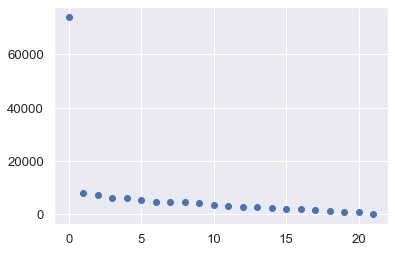

In [271]:
plt.plot(S, 'o')

In [ ]:
# Maybe run the analysis for the other patients, then talk to Minsun about
# dimensionality reduction, adding max for PTV, etc.